In [311]:
# import libraries pandas and matplotlib.
import pandas as pd
import matplotlib.pyplot as plt

In [312]:
# load dataset and other corresponding files.
data_2020 = pd.read_csv("BRFSS_2020_data.csv")
state_FIPS = pd.read_csv("state_name_FIPS.csv")
income_value = pd.read_csv("income_value.csv")
education_value = pd.read_csv("education_level_value.csv")

In [313]:
# replace the _STATE column based on STATE_NAME, FIPS CODE from another dataframe state_FIPS.
# reference: https://stackoverflow.com/questions/36413993/replace-column-values-in-one-dataframe-by-values-of-another-dataframe
data_2020['_STATE'] = data_2020['_STATE'].map(state_FIPS.set_index('_STATE')['STATE_NAME'])

# count the frequencies of each state, save into the dataframe df_state_frequency.
# reference: https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/#:~:text=To%20count%20the%20number%20of%20occurrences%20in%20e.g.%20a%20column,in%20the%20column%20%E2%80%9Ccondition%E2%80%9D
# reference: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe/47136484
df_state_frequency = data_2020['_STATE'].value_counts().rename_axis('State').reset_index(name = 'Frequency')
df_state_frequency

,State,Frequency
0,Minnesota,15835
1,Nebraska,14796
2,New York,14769
3,Ohio,14676
4,Maryland,14292
5,Washington,12902
6,Florida,11799
7,New Jersey,11382
8,Texas,11042
9,Maine,11015


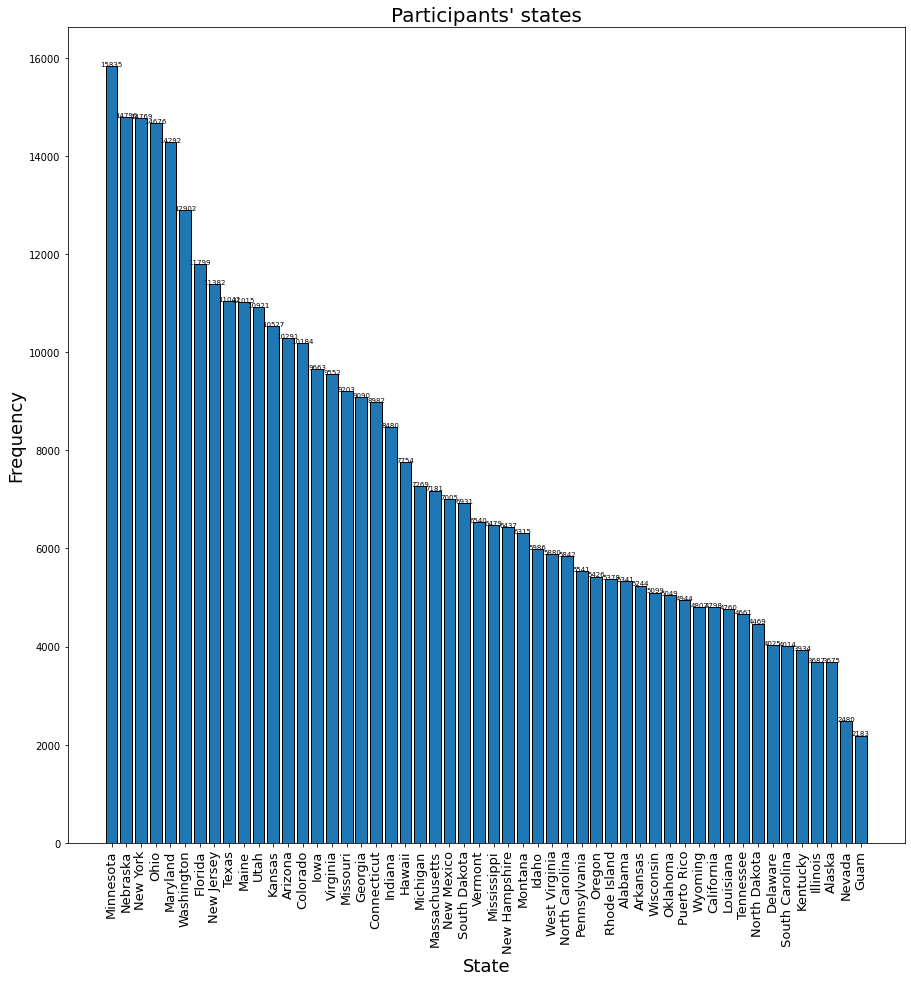

In [314]:
# use matplotlib to draw the bar charts of participants' states.
# set figure size, x/y label names, x/y sticks, figure title.
plt.figure(figsize=(15,15))
plt.bar(df_state_frequency.State, height = df_state_frequency.Frequency, edgecolor = "black")
plt.xlabel("State",fontsize = 18)
plt.ylabel("Frequency",fontsize = 18)
plt.xticks(rotation = 90, fontsize= 13)
plt.yticks(fontsize = 10)
plt.title("Participants' states", fontsize = 20)
for x,y in enumerate(df_state_frequency.Frequency):
   plt.text(x, y+1, '%.0f'%y, ha = 'center', fontsize = 7)
plt.show()

In [315]:
# same for variable sex(_SEX).
# Replace the _SEX column: if value = 1, sex is male. if value = 2, sex is female.
# reference: https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python
data_2020['_SEX'].replace({1:'male',2:'female'}, inplace = True)

df_sex_frequency = data_2020['_SEX'].value_counts().rename_axis('Sex').reset_index(name = 'Frequency')
df_sex_frequency

,Sex,Frequency
0,female,218027
1,male,183931


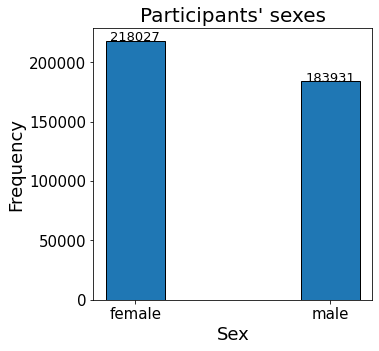

In [326]:
# use matplotlib to draw the bar charts of participants' sexes.
plt.figure(figsize=(5,5))
plt.bar(df_sex_frequency.Sex, height = df_sex_frequency.Frequency, width = 0.3, edgecolor = "black")
plt.xlabel("Sex",fontsize = 18)
plt.ylabel("Frequency",fontsize = 18)
plt.xticks(fontsize= 15)
plt.yticks(fontsize = 15)
plt.title("Participants' sexes", fontsize = 20)
for x,y in enumerate(df_sex_frequency.Frequency):
   plt.text(x, y+1, '%.0f'%y, ha = 'center', fontsize = 13)
plt.show()

In [317]:
# same for variable income(_INCOMG).
data_2020['_INCOMG'] = data_2020['_INCOMG'].map(income_value.set_index('_INCOMG')['INCOME'])
df_income_frequency = data_2020['_INCOMG'].value_counts().rename_axis('Income').reset_index(name = 'Frequency')
df_income_frequency

,Income,Frequency
0,> $50000,171265
1,Dont know/missing,80057
2,$ 15000-25000,48767
3,$ 35000-50000,43851
4,$ 25000-35000,31410
5,< $15000,26608


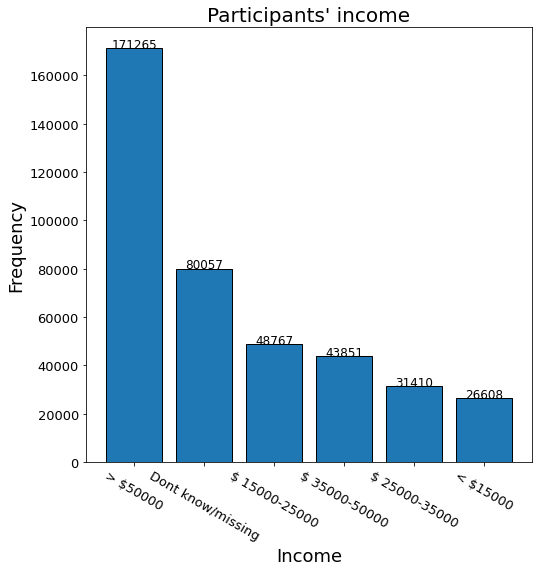

In [327]:
# use matplotlib to draw the bar charts of participants' income.
plt.figure(figsize=(8,8))
plt.bar(df_income_frequency.Income,height = df_income_frequency.Frequency, edgecolor = "black")
plt.xlabel("Income",fontsize = 18)
plt.ylabel("Frequency",fontsize = 18)
plt.xticks(rotation = 330, fontsize= 13)
plt.yticks(fontsize = 13)
plt.title("Participants' income", fontsize = 20)
for x,y in enumerate(df_income_frequency.Frequency):
   plt.text(x, y+1, '%.0f'%y, ha = 'center', fontsize = 12)
plt.show()

In [319]:
# same for variable education level(_EDUCAG').
data_2020['_EDUCAG'] = data_2020['_EDUCAG'].map(education_value.set_index('_EDUCAG')['EDUCATION LEVEL'])
df_education_frequency = data_2020['_EDUCAG'].value_counts().rename_axis('Education_level').reset_index(name = 'Frequency')
df_education_frequency

,Education_level,Frequency
0,College/Technical school graduated,155340
1,College/Technical school attended,111387
2,High school graduated,107096
3,High school not graduated,26248
4,Dont know/missing,1887


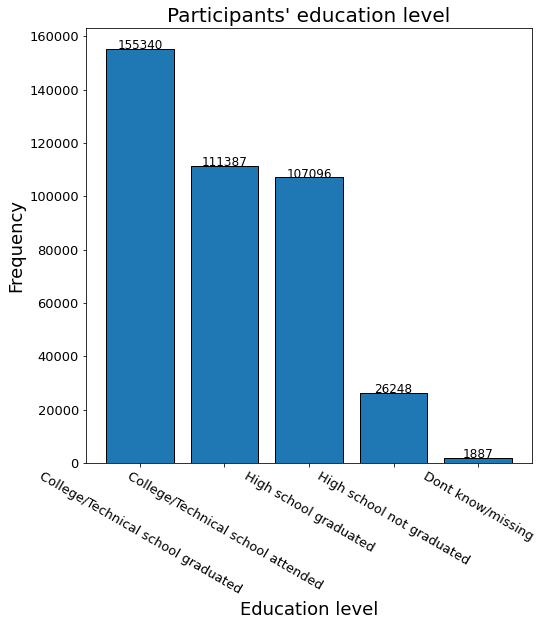

In [328]:
# use matplotlib to draw the bar charts of participants' education levels.
plt.figure(figsize=(8,8))
plt.bar(df_education_frequency.Education_level,height = df_education_frequency.Frequency, edgecolor = "black")
plt.xlabel("Education level",fontsize = 18)
plt.ylabel("Frequency",fontsize = 18)
plt.xticks(rotation = 330, fontsize= 13)
plt.yticks(fontsize = 13)
plt.title("Participants' education level", fontsize = 20)
for x,y in enumerate(df_education_frequency.Frequency):
   plt.text(x, y+1, '%.0f'%y, ha = 'center', fontsize = 12)
plt.show()

In [321]:
# to see whether there is duplicate data in the dataset.
data_2020_duplicate = data_2020[data_2020.duplicated()]
data_2020_duplicate

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4


In [322]:
# count the missing values of each column in the dataset, save into the dataframe data_2020_missing.
data_2020_missing = data_2020.isnull().sum()
data_2020_missing = data_2020_missing.rename_axis('Variable').reset_index(name = 'Count_missing_values')
data_2020_missing

,Variable,Count_missing_values
0,Unnamed: 0,0
1,_STATE,3428
2,FMONTH,0
3,IDATE,0
4,IMONTH,0
...,...,...
275,_STOLDNA,225601
276,_VIRCOLN,227684
277,_SBONTIM,207741
278,_CRCREC1,226260


In [323]:
# in the data_2020_missing, only keep the variables that count_missing_values > 1000.
data_2020_missing = data_2020_missing[data_2020_missing.Count_missing_values > 1000]

# clean the dataset data_2020, so that it only contains variables that have < 1000 missing values.
for column in data_2020.columns:
    if column in list(data_2020_missing['Variable']):
        data_2020 = data_2020.drop(column, 1)

C:\Users\51968\AppData\Local\Temp/ipykernel_57372/95872002.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_2020 = data_2020.drop(column, 1)
